In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4)
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

def array_to_latex_matrix(arej):
    vrstic = len(arej)
    stolpcev = len(arej[0])
    zacetek =r"""\left[ \begin{{array}}{{{cji}}}
    """.format(cji="c"*stolpcev)
    konec = r"""\end{array} \right] """
    
    vsebina= ""
    for i in range(vrstic):
        for j in range(stolpcev):
            vsebina = vsebina + "{:.3}".format(arej[i][j])
            if not j==stolpcev-1:
                vsebina += r"&"
        if not i == vrstic-1:
            vsebina = vsebina+r"""\\\

"""
    return zacetek + vsebina+ konec



In [2]:
def sferno(N = 1000):
    """Generira enakomerne smeri po sfernem kotu.
    Vrne kartezični array shapa (N,3)"""
    import numpy as np
    fiji = np.random.uniform(size=N)*2*np.pi
    thete = np.arccos(2*np.random.uniform(size=N)-1)
    
    pi = np.pi
    sin = np.sin
    cos = np.cos
    def karteziraj(array):
        """Dobi array shapa (N,2) in ga transformira v kartezične koordinate (x,y,z) shapa (N, 3)"""
        N = array.shape[0]
        res = np.zeros((N,3))
        for i in range(N):
            t,f = array[i]
            x = sin(t)*cos(f)
            y = sin(t)*sin(f)
            z = cos(t)
            res[i] = [x,y,z]

        return res.reshape(N,3)
    # Create a sphere
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x = r*sin(phi)*cos(theta)
    y = r*sin(phi)*sin(theta)
    z = r*cos(phi)

    #Set colours and render


    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    rezultati = karteziraj(np.array([fiji, thete]).T)
    xx,yy,zz = rezultati[:,0], rezultati[:,1],rezultati[:,2]
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=1, linewidth=0)

    ax.scatter(xx,yy,zz ,color="k",s=5
              )

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_aspect("equal")
    plt.tight_layout()
    #plt.savefig("2-1-1sfera.jpg")
    plt.show()

    return rezultati
#sferno(10000).mean(axis=0)

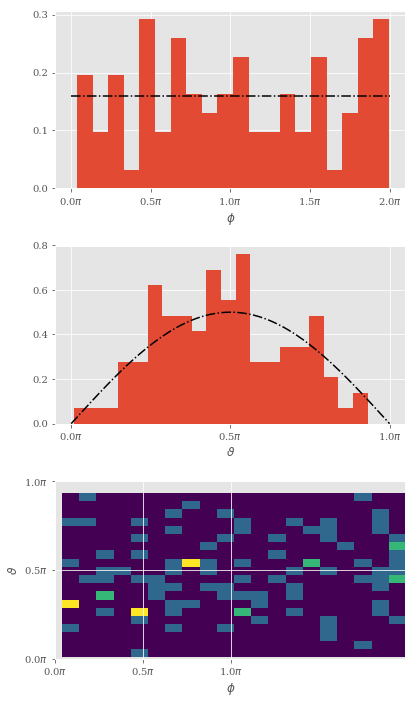

In [3]:
def sferno_porazdelitev(N = 1000):

    import numpy as np
    fiji = np.random.uniform(size=N)*2*np.pi
    thete = np.arccos(2*np.random.uniform(size=N)-1)
    
    plt.figure(figsize=(6,10))
    plt.subplot(311)
    plt.hist(fiji, density=1, bins=20)
    plt.xlabel(r"$\phi$")
    tiki = np.arange(start=0, step=0.5*np.pi, stop=7)
    plt.xticks(tiki, [fr"{i}$\pi$" for i in tiki/np.pi])
    plt.hlines(y=1/2/np.pi, linestyles="-.", xmin=tiki.min(), xmax=tiki.max())
    
    plt.subplot(312)
    plt.hist(thete,density=1, bins=20)
    tiki = np.arange(start=0, step=0.5*np.pi, stop=3.5)
    plt.xticks(tiki, [fr"{i}$\pi$" for i in tiki/np.pi])
    razpon = np.linspace(tiki.min(), tiki.max(), 200)
    plt.plot(razpon, 0.5*np.sin(razpon), "k-.")
    plt.xlabel(r"$\vartheta$")
    
    plt.subplot(313)
    plt.hist2d(fiji, thete, bins=20)
    plt.xlabel(r"$\phi$")
    tikix = np.arange(start=0, step=0.5*np.pi, stop=7)
    plt.xticks(tiki, [fr"{i}$\pi$" for i in tikix/np.pi])
    tikiy = np.arange(start=0, step=0.5*np.pi, stop=3.5)
    plt.yticks(tiki, [fr"{i}$\pi$" for i in tikiy/np.pi])
    plt.ylabel(r"$\vartheta$")
    
    plt.tight_layout(h_pad=1.1)
    #plt.savefig("2-2-porazdelitve.pdf")
    #plt.savefig("2-2-porazdelitve.jpg")
    plt.show()

sferno_porazdelitev(100)

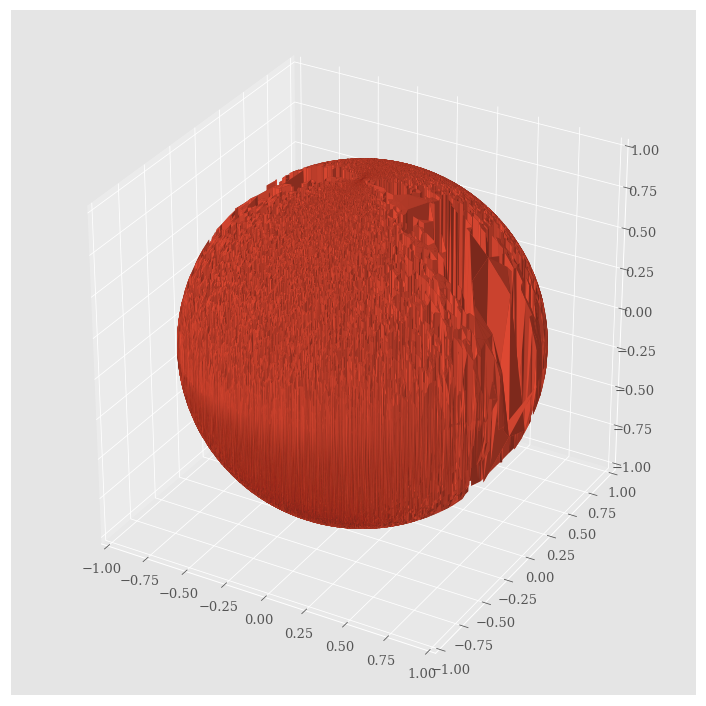

array([[-0.1137,  0.4766,  0.8718],
       [-0.1825,  0.9716,  0.1505],
       [-0.5044,  0.8538, -0.129 ],
       ...,
       [ 0.2573,  0.9613,  0.098 ],
       [ 0.5593,  0.8289,  0.0094],
       [ 0.1223,  0.8413,  0.5266]])

In [118]:
def dipol(N = 1000):
    """Generira dipolno sevanje.
    Vrne kartezični array shapa (N,3).
    Tudi splota."""
    import numpy as np
    fiji = np.random.uniform(size=N)*2*np.pi
    def esci_le_thete(size=N):
        """Zbiseka transcendenčno enačbo
        za porazdelitev po theti in ti naštepa
        arej thet shapa (N,)."""
        from scipy.optimize import bisect
        from numpy.random import uniform
        def f(t, u):
            return 0.25 * (3* np.cos(t)- (np.cos(t))**3) + 0.5 - u
        return np.array([bisect(f, 0, np.pi, args=(i)) for i in np.random.uniform(size=size)])
    thete = esci_le_thete(size=N)
    
    pi = np.pi
    sin = np.sin
    cos = np.cos
    def karteziraj(array):
        """Dobi array shapa (N,2) in ga transformira v kartezične koordinate (x,y,z) shapa (N, 3)"""
        N = array.shape[0]
        res = np.zeros((N,3))
        for i in range(N):
            t,f = array[i]
            x = sin(t)*cos(f)
            y = sin(t)*sin(f)
            z = cos(t)
            res[i] = [x,y,z]

        return res.reshape(N,3)
    # Create a sphere
    r = 1
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x = r*sin(phi)*cos(theta)
    y = r*sin(phi)*sin(theta)
    z = r*cos(phi)

    #Set colours and render


    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    rezultati = karteziraj(np.array([fiji, thete]).T)
    xx,yy,zz = rezultati[:,0], rezultati[:,1],rezultati[:,2]
    #ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

    ax.scatter(xx,yy,zz 
                    #,color="k",s=5
              )

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_aspect("equal")
    plt.tight_layout()
    #plt.savefig("2-1-1sfera.jpg")
    plt.show()

    return rezultati
dipol(100000)

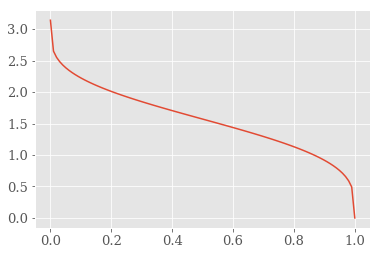

In [104]:
from scipy.optimize import bisect

def f(t, u):
    return 0.25 * (3* np.cos(t)- (np.cos(t))**3) + 0.5 - u
razpon = np.linspace(0,1,100)

plt.plot(razpon,[bisect(f, 0, np.pi, args=(i)) for i in razpon])

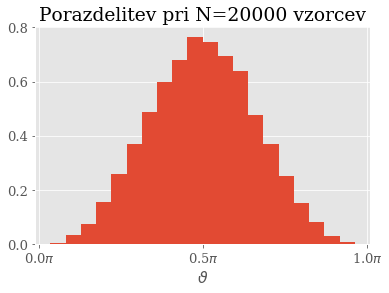

In [111]:
N = 20000
sempli = np.array([bisect(f, 0, np.pi, args=(i)) for i in np.random.uniform(size=N)])
plt.hist(sempli, density=1, bins=20)
plt.title(f"Porazdelitev pri N={N} vzorcev")
plt.xlabel(r"$\vartheta$")
tiki = np.arange(start=0, step=0.5*np.pi, stop=3.5)
plt.xticks(tiki, [fr"{i}$\pi$" for i in tiki/np.pi])
plt.savefig("2-3-dipol.pdf")
plt.show()


In [130]:
def thetaj(N):
    import math
    import random

    # define any function here!
    def f(x):
        return (math.sin(x))**2
    # f(x) = 1.0 : for uniform probability distribution

    # f(x) = x : for triangular probability distribution
    # (math.sqrt(random.random()) would also produce triangular p.d. though.)

    # f(x) = math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi) : for std normal p.d.
    # (taking average of (last) 2,3,... random.random() values would also
    # produce normal probability distributions though.)

    # define any xmin-xmax interval here! (xmin < xmax)
    xmin = 0.0
    xmax = math.pi

    # find ymin-ymax
    numSteps = 1000000 # bigger the better but slower!
    ymin = f(xmin)
    ymax = ymin
    for i in range(numSteps):
        x = xmin + (xmax - xmin) * float(i) / numSteps
        y = f(x)
        if y < ymin: ymin = y
        if y > ymax: ymax = y

    n = N # how many random numbers to generate
    rezultati = []
    for i in range(n):
        while True:
            # generate a random number between 0 to 1
            xr = random.random()
            yr = random.random()
            x = xmin + (xmax - xmin) * xr
            y = ymin + (ymax - ymin) * yr
            if y <= f(x):
                rezultati.append(np.pi*xr)
                break
    return rezultati

thetaj(12)

[1.153422883598522,
 2.406279070206699,
 1.680327164813051,
 1.6735223034772155,
 2.0323281874635883,
 2.110487750298029,
 2.385651642452018,
 1.7387635946790474,
 1.8627892990237338,
 1.351801792096566,
 1.058431794063759,
 1.3632423407829843]

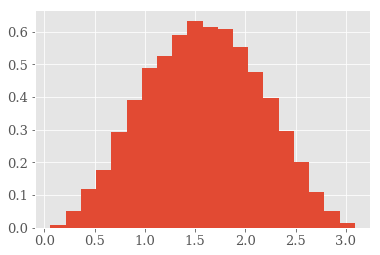

In [134]:
plt.hist(thetaj(10000), bins=20, density=1)
plt.savefig("2-3-1-dipol2.pdf")

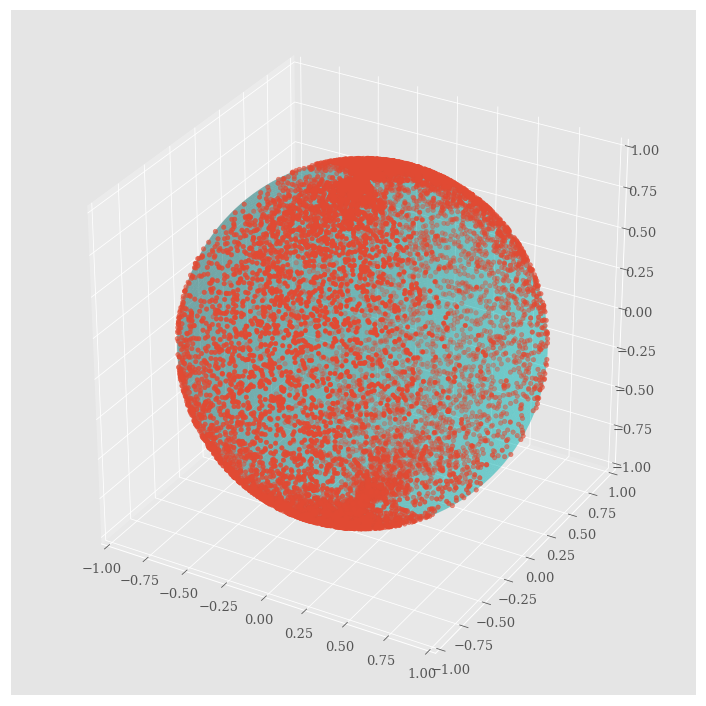

array([[-0.0951, -0.8011,  0.5909],
       [ 0.1294,  0.3917, -0.9109],
       [-0.0358, -0.091 ,  0.9952],
       ...,
       [-0.8665, -0.4764,  0.1491],
       [ 0.3029,  0.5714,  0.7627],
       [ 0.3743,  0.8752, -0.3064]])

In [133]:
def dipol2(N = 1000):
    """Generira dipolno sevanje.
    Vrne kartezični array shapa (N,3).
    Tudi splota."""
    import numpy as np
    fiji = np.random.uniform(size=N)*2*np.pi
    thete = thetaj(N)
    
    pi = np.pi
    sin = np.sin
    cos = np.cos
    def karteziraj(array):
        """Dobi array shapa (N,2) in ga transformira v kartezične koordinate (x,y,z) shapa (N, 3)"""
        N = array.shape[0]
        res = np.zeros((N,3))
        for i in range(N):
            t,f = array[i]
            x = sin(t)*cos(f)
            y = sin(t)*sin(f)
            z = cos(t)
            res[i] = [x,y,z]

        return res.reshape(N,3)
    # Create a sphere
    r = 1
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x = r*sin(phi)*cos(theta)
    y = r*sin(phi)*sin(theta)
    z = r*cos(phi)

    #Set colours and render


    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    rezultati = karteziraj(np.array([fiji, thete]).T)
    xx,yy,zz = rezultati[:,0], rezultati[:,1],rezultati[:,2]
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

    ax.scatter(xx,yy,zz 
                    #,color="k",s=5
              )

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_aspect("equal")
    plt.tight_layout()
    #plt.savefig("2-1-1sfera.jpg")
    plt.show()

    return rezultati
dipol2(10000)

In [161]:
def sferno(N = 1000):
    """Generira enakomerne smeri po sfernem kotu.
    Vrne polarni array shapa (N,2)"""
    import numpy as np
    fiji = np.random.uniform(size=N)*2*np.pi
    thete = np.arccos(2*np.random.uniform(size=N)-1)


    return np.array([fiji, thete]).T
sempli = sferno(N=100000)
fiji = sempli[:,0]
thete = sempli[:,1]
print(fr"Povprečen $\phi$: {fiji.mean()}, {np.pi}")
print(fr"Povprečen $\vartheta$: {thete.mean()}, {np.pi/2}")
print(fr"Povprečen cos theta: {np.cos(thete).mean():0.3}")
def Y11(fiji, thete):
    return -0.3455 * np.sin(thete) * (np.cos(fiji) + 1j*np.sin(fiji))
def Y10(fiji, thete):
    return 0.488 * np.cos(thete)
print(fr"Povprečen Y1,1: {Y11(fiji, thete).mean()}")
print(fr"Povprečen Y1,0: {Y10(fiji, thete).mean()}")

Povprečen $\phi$: 3.1354802238574777, 3.141592653589793
Povprečen $\vartheta$: 1.5660355149703635, 1.5707963267948966
Povprečen cos theta: 0.00369
Povprečen Y1,1: (-0.00036513058510727846-0.0006304019932984262j)
Povprečen Y1,0: 0.0018021095793207221


In [155]:
def sferno(N = 1000):
    """Generira enakomerne smeri po sfernem kotu.
    Vrne polarni array shapa (N,2)"""
    import numpy as np
    fiji = np.random.uniform(size=N)*2*np.pi
    thete = np.arccos(2*np.random.uniform(size=N)-1)


    return np.array([fiji, thete]).T
sempli = sferno(N=100000)
fiji = sempli[:,0]
thete = sempli[:,1]
print(fr"Povprečen $\phi$: {fiji.mean()}, {np.pi}")
print(fr"Povprečen $\vartheta$: {thete.mean()}, {np.pi/2}")
print(fr"Povprečen cos theta: {np.cos(thete).mean():0.3}")
def Y11(fiji, thete):
    return -0.3455 * np.sin(thete) * (np.cos(fiji) + 1j*np.sin(fiji))
def Y10(fiji, thete):
    return 0.488 * np.cos(thete)
print(fr"Povprečen Y1,1: {Y11(fiji, thete).mean()}")
print(fr"Povprečen Y1,0: {Y10(fiji, thete).mean()}")

(4+4j)

In [162]:
def dipol(N = 1000):
    """Generira dipolno sevanje.
    Vrne kartezični array shapa (N,3).
    Tudi splota."""
    import numpy as np
    fiji = np.random.uniform(size=N)*2*np.pi
    def esci_le_thete(size=N):
        """Zbiseka transcendenčno enačbo
        za porazdelitev po theti in ti naštepa
        arej thet shapa (N,)."""
        from scipy.optimize import bisect
        from numpy.random import uniform
        def f(t, u):
            return 0.25 * (3* np.cos(t)- (np.cos(t))**3) + 0.5 - u
        return np.array([bisect(f, 0, np.pi, args=(i)) for i in np.random.uniform(size=size)])
    thete = esci_le_thete(size=N)
    return np.array([fiji, thete]).T

sempli = dipol(N=100000)
fiji = sempli[:,0]
thete = sempli[:,1]
print(fr"Povprečen $\phi$: {fiji.mean()}, {np.pi}")
print(fr"Povprečen $\vartheta$: {thete.mean()}, {np.pi/2}")
print(fr"Povprečen cos theta: {np.cos(thete).mean():0.3}")
def Y11(fiji, thete):
    return -0.3455 * np.sin(thete) * (np.cos(fiji) + 1j*np.sin(fiji))
def Y10(fiji, thete):
    return 0.488 * np.cos(thete)
print(fr"Povprečen Y1,1: {Y11(fiji, thete).mean()}")
print(fr"Povprečen Y1,0: {Y10(fiji, thete).mean()}")

Povprečen $\phi$: 3.14282391946352, 3.141592653589793
Povprečen $\vartheta$: 1.5719803848820284, 1.5707963267948966
Povprečen cos theta: -0.00103
Povprečen Y1,1: (0.00018894826853006408-8.479988082510418e-05j)
Povprečen Y1,0: -0.0005043009615243707


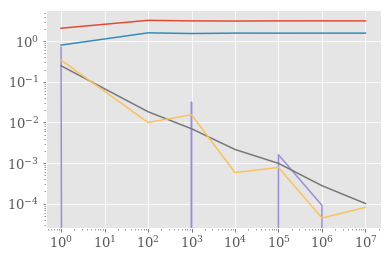

In [184]:

nji = [1,100,1000,10000, int(1e5), int(1e6), int(1e7)]
potence = np.zeros((len(nji), 5))
for i,n in enumerate(nji):
    sempli = sferno(N=n)
    fiji = sempli[:,0]
    thete = sempli[:,1]
    potence[i]=fiji.mean(), thete.mean(),np.cos(thete).mean(),np.abs(Y11(fiji, thete).mean()),np.abs(Y10(fiji, thete).mean())
plt.figure()
plt.loglog()
for vrstica in potence.T:
    plt.plot(nji, vrstica)
plt.show()

In [176]:
potence.keys()

dict_keys([1, 100, 1000, 10000, 100000, 1000000])